현재 작업 디렉토리: c:\Source\miniproject-2025\arduino
Index(['date_time', 'active_power', 'voltage', 'current', 'frequency',
       'apparent_power', 'reactive_power', 'power_factor', 'phase_difference',
       'current_phase', 'voltage_phase'],
      dtype='object')
LSTM 입력 데이터 shape: (2591970, 30, 1)
LSTM 출력 데이터 shape: (2591970, 1)


c:\Users\Admin\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 476s 7ms/step - loss: 1.9756e-05 - val_loss: 9.0667e-07
Epoch 2/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 359s 5ms/step - loss: 1.4767e-06 - val_loss: 6.7174e-07
Epoch 3/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 376s 6ms/step - loss: 1.2878e-06 - val_loss: 1.1918e-06
Epoch 4/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 634s 10ms/step - loss: 1.2776e-06 - val_loss: 9.3555e-07
Epoch 5/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 688s 10ms/step - loss: 1.3537e-06 - val_loss: 5.8117e-07
Epoch 6/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 702s 10ms/step - loss: 1.2863e-06 - val_loss: 6.4440e-07
Epoch 7/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 663s 10ms/step - loss: 1.2351e-06 - val_loss: 7.4989e-07
Epoch 8/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 668s 10ms/step - loss: 1.1902e-06 - val_loss: 5.6472e-07
Epoch 9/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 649s 10ms/step - loss: 1.2188e-06 - val_loss: 5.6357e-07
Epoch 10/10
64800/64800 ━━━━━━━━━━━━━━━━━━━━ 639s 10ms/step - loss: 1.1233e-06 - val_loss: 4.7

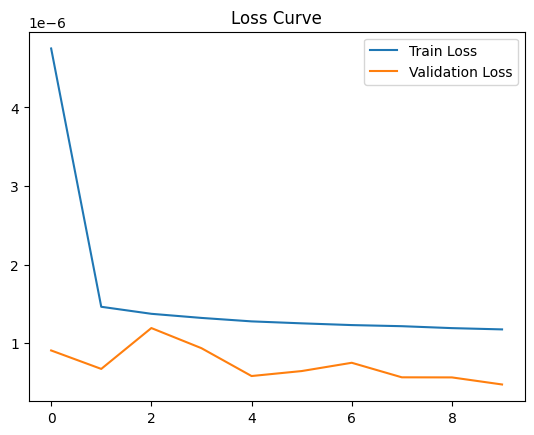

16200/16200 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step


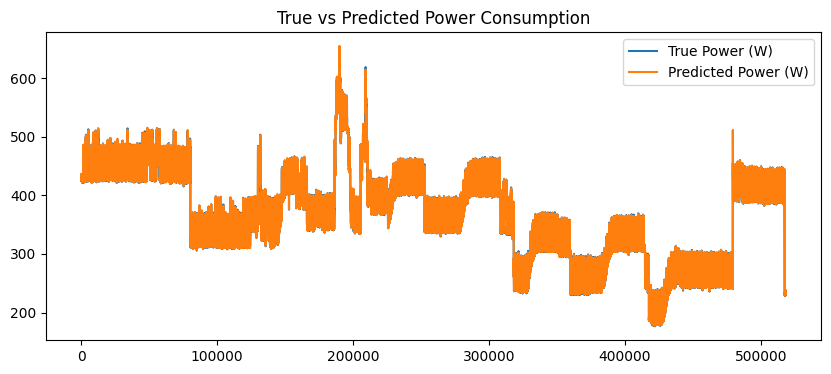

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

print("현재 작업 디렉토리:", os.getcwd())

# 1. 데이터 경로
data_path = r'C:\Source\miniproject-2025\Sample\01.원천데이터\house_001\ch01\H001_ch01_20230922.csv'

# 2. CSV 데이터 불러오기
df = pd.read_csv(data_path)

# 3. 열 이름 확인 및 지정
# if df.shape[1] >= 2:
#     df.columns = ['time', 'W']
# else:
#     raise Exception("CSV 파일 구조가 예상과 다릅니다. 열이 2개 이상 필요합니다.")

# print("데이터 미리보기:\n", df.head())

print(df.columns)  # 실제 열 이름 확인

# 예시: 'timestamp', 'power', 'voltage', ... 이런 식일 수 있음
df = df[['date_time', 'active_power']]  # 진짜 필요한 열로 바꿈
df.columns = ['time', 'W']  # 새 이름 지정

# 4. 전력 데이터만 추출
power = df['W'].values.reshape(-1, 1)

# 5. 스케일링
scaler = MinMaxScaler()
power_scaled = scaler.fit_transform(power)

# 6. LSTM 시퀀스 생성
timesteps = 30  # 30개 timestep 사용
X, y = [], []

for i in range(len(power_scaled) - timesteps):
    X.append(power_scaled[i:i+timesteps])
    y.append(power_scaled[i+timesteps])

X = np.array(X)
y = np.array(y)

print("LSTM 입력 데이터 shape:", X.shape)
print("LSTM 출력 데이터 shape:", y.shape)

# 7. Train/Test split (80%)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 8. LSTM 모델 정의
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(timesteps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# 9. 학습
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32,
                    callbacks=[early_stop])

# 10. Loss 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# 11. 예측
y_pred = model.predict(X_test)

# 12. 원래 스케일로 복원
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# 13. 결과 시각화
plt.figure(figsize=(10,4))
plt.plot(y_test_inv, label='True Power (W)')
plt.plot(y_pred_inv, label='Predicted Power (W)')
plt.title('True vs Predicted Power Consumption')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

print("현재 작업 디렉토리:", os.getcwd())

# 1. 데이터 경로
data_path = r'C:\Source\miniproject-2025\Sample\01.원천데이터\house_001\ch01\H001_ch01_20230922.csv'

# 2. CSV 데이터 불러오기
df = pd.read_csv(data_path)

# 3. 열 이름 확인 및 지정
df['date_time'] = pd.to_datetime(df['date_time'])  # datetime 변환
df = df[['date_time', 'active_power']]
df.columns = ['time', 'W']  # 컬럼명 재설정

# 4. Resampling 함수 (일/주/월)
def resample_data(df, rule):
    resampled_df = df.resample(rule, on='time').sum().reset_index()
    return resampled_df

# 5. LSTM 입력 데이터 생성 함수
def prepare_lstm_data(df, column='W', timesteps=30):
    data = df[column].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data_scaled) - timesteps):
        X.append(data_scaled[i:i+timesteps])
        y.append(data_scaled[i+timesteps])
    X = np.array(X)
    y = np.array(y)

    return X, y, scaler

# 6. LSTM 모델 학습 함수
def train_lstm(X, y, epochs=10, batch_size=32):
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(64, activation='tanh', input_shape=(X.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stop],
                        verbose=0)  # verbose=1로 하면 출력됨

    return model, history, X_test, y_test

# 7. 결과 시각화 함수
def plot_results(y_true, y_pred, scaler, title):
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    plt.figure(figsize=(10,4))
    plt.plot(y_true_inv, label='True')
    plt.plot(y_pred_inv, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

# 8. 일별, 주별, 월별 처리
timeframes = {'일별':'D', '주별':'W', '월별':'M'}
timesteps_dict = {'일별':30, '주별':10, '월별':5}  # 데이터 개수 적을수록 timestep 줄임

for name, rule in timeframes.items():
    print(f"\n--- {name} 데이터 처리 ---")
    resampled_df = resample_data(df, rule)
    timesteps = timesteps_dict[name]
    
    if len(resampled_df) < timesteps + 10:  # 데이터 부족시 건너뜀
        print(f"{name} 데이터가 부족합니다. 건너뜁니다.")
        continue

    X, y, scaler = prepare_lstm_data(resampled_df, timesteps=timesteps)
    model, history, X_test, y_test = train_lstm(X, y)

    # Loss plot
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss Curve')
    plt.legend()
    plt.show()

    # Prediction
    y_pred = model.predict(X_test)
    plot_results(y_test, y_pred, scaler, f'{name} 전력 예측 결과')

print("모든 처리 완료!")


현재 작업 디렉토리: c:\Source\miniproject-2025\arduino

--- 일별 데이터 처리 ---
일별 데이터가 부족합니다. 건너뜁니다.

--- 주별 데이터 처리 ---
주별 데이터가 부족합니다. 건너뜁니다.

--- 월별 데이터 처리 ---
월별 데이터가 부족합니다. 건너뜁니다.
모든 처리 완료!


C:\Users\Admin\AppData\Local\Temp\ipykernel_22844\2263908698.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df.resample(rule, on='time').sum().reset_index()


Epoch 1/200


c:\Users\Admin\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3303 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3021
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2741
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2456
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2192
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2023
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1795
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1638
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1475
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1340
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1207
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1109 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1040
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0994
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0994
Epoch 16/200
2/2 ━━━━━━━━━━━━━

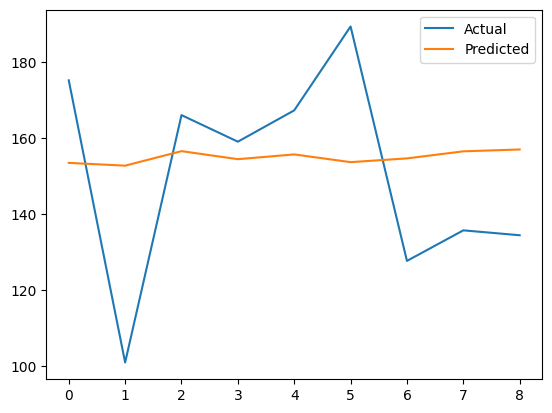

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('power_monthly.csv')  # 'year', 'month', 'power_consumption' 컬럼 필요

# 피처 생성
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['power_consumption'] = data['power_consumption'].astype(float)

# LSTM용 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['power_consumption']])

# 시퀀스 데이터 준비
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 12
X, y = create_sequences(scaled_data, SEQ_LEN)

# 학습/검증 분리
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM 모델
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=1)

# 예측
pred = model.predict(X_test)
pred_inversed = scaler.inverse_transform(pred)
y_test_inversed = scaler.inverse_transform(y_test)

# 결과 확인
plt.plot(y_test_inversed, label='Actual')
plt.plot(pred_inversed, label='Predicted')
plt.legend()
plt.show()

# 최종 모델 저장
model.save('power_predict_lstm.h5')

Epoch 1/200


c:\Users\Admin\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3629
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2620
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1841
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1460
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1317
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1512
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1085
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1350
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1308
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1394
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1018
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1137
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1070
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1229
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1091
Epoch 16/200
2/2 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


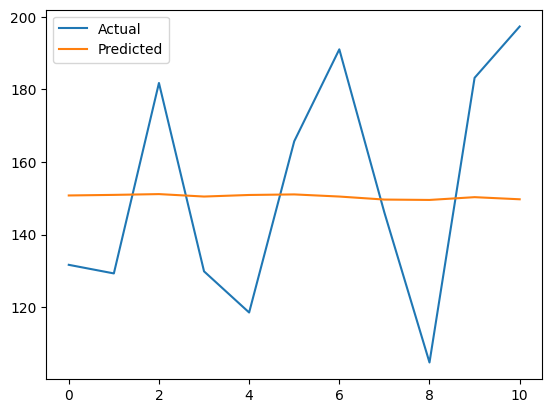

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('power_monthly_with_hourly.csv')  # 'year', 'month', 'power_consumption' 컬럼 필요

# 피처 생성
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['monthly_power_consumption'] = data['monthly_power_consumption'].astype(float)

# LSTM용 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['monthly_power_consumption']])

# 시퀀스 데이터 준비
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 12
X, y = create_sequences(scaled_data, SEQ_LEN)

# 학습/검증 분리
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM 모델
model = Sequential([
    LSTM(100, activation='tanh',           # LSTM에 일반적으로 사용되는 활성화 함수
         input_shape=(SEQ_LEN, 1),
         dropout=0.2,                 # 입력 dropout (20%)
         recurrent_dropout=0.2),      # recurrent dropout (20%)
    Dropout(0.3),                     # LSTM 출력 후 dropout 추가 (30%)
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=1)

# 예측
pred = model.predict(X_test)
pred_inversed = scaler.inverse_transform(pred)
y_test_inversed = scaler.inverse_transform(y_test)

# 결과 확인
plt.plot(y_test_inversed, label='Actual')
plt.plot(pred_inversed, label='Predicted')
plt.legend()
plt.show()

# 최종 모델 저장
model.save('power_predict_lstm.keras')